<a href="https://colab.research.google.com/github/marxaklphd/ML-Classification/blob/main/KNeighborsClassifieronMultioutput_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
#print(mnist_data.DESCR)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist.data,mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
'''multilabel classification system: classification system
that outputs multiple binary tags
'''
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_over6 = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_train_multilabel = np.c_[y_train_over6,y_train_odd]
knnc = KNeighborsClassifier()
knnc.fit(X_train,y_train_multilabel)

KNeighborsClassifier()

In [7]:
digit_is_5 = X[0]
knnc.predict([digit_is_5])

array([[False,  True]])

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


y_train_knnc_predict = cross_val_predict(knnc,X_train,
                                         y_train_multilabel,cv=3)

In [12]:
from sklearn.metrics import f1_score
f1_score(y_train_multilabel,y_train_knnc_predict,
         average='macro')

0.976410265560605

In [13]:
f1_score(y_train_multilabel,y_train_knnc_predict,
         average='weighted')

0.9778357403921755

In [ ]:
# Thus the classes are already pretty well balanced.

In [15]:
from sklearn.svm import SVC


In [17]:
from sklearn.multioutput import ClassifierChain
chain_classifier = ClassifierChain(SVC(),cv=3)
chain_classifier.fit(X_train[:2000],y_train_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3)

In [18]:
chain_classifier.predict([digit_is_5])

array([[0., 1.]])

In [20]:
# now testing KNeighborsClassifier on Multioutput Classification
''' Random noise is added to the pixel values of the training and test sets of images (X_train and X_test).
The purpose of adding noise is to create modified versions of the original images, which can be used
 for data augmentation or to simulate noisy environments for testing the robustness of ML to be
 used next and for data augmentation.'''
noise1 = np.random.randint(0, 200, (len(X_train), 784))
X_train_noisy = X_train + noise1
noise2 = np.random.randint(0, 200, (len(X_test), 784))
X_test_noisy = X_test + noise2



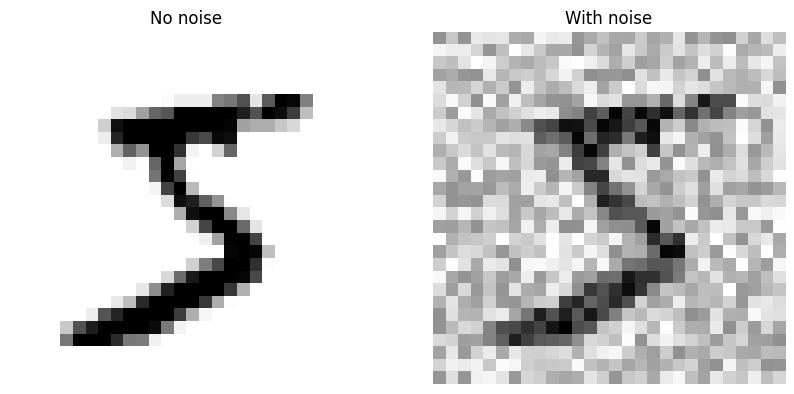

In [28]:
def digit_plot(data):
  image = data.reshape(28,28)
  plt.imshow(image,cmap='binary')
  plt.axis(False)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
digit_plot(X_train[0])
plt.title('No noise')

plt.subplot(1, 2, 2)
digit_plot(X_train_noisy[0])
plt.title('With noise')

plt.show()

In [29]:
knnc.fit(X_train_noisy,X_train)

KNeighborsClassifier()

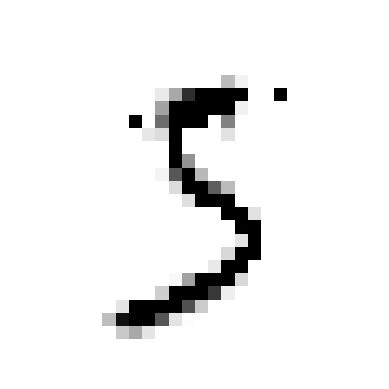

In [33]:
# now predict and plot the result:
digit_plot(knnc.predict([X_train_noisy[0]]))